In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Statistical pandas

In [6]:
baskets = pd.read_csv('./data/baskets.csv')
baskets

,Unnamed: 0,order_id,items
0,0,1342,"['Raw Shrimp', 'Seedless Cucumbers', 'Versatil..."
1,1,1591,"['Cracked Wheat', 'Strawberry Rhubarb Yoghurt'..."
2,2,4519,['Beet Apple Carrot Lemon Ginger Organic Cold ...
3,3,4935,['Vodka']
4,4,6357,"['Globe Eggplant', 'Panko Bread Crumbs', 'Fres..."
...,...,...,...
131204,131204,3397914,"['Organic Baby Spinach', 'Raspberries', 'Organ..."
131205,131205,3410618,"['Trilogy Kombucha', 'Good Buddy Beef Jerky Do..."
131206,131206,3411285,"['Organic Rice Ramen', 'Organic Lemongrass Gin..."
131207,131207,3413554,['Shredded Parmigiano Reggiano']


In [7]:
from ast import literal_eval
baskets['items'] = baskets['items'].map(literal_eval)

In [9]:
leng = [len(x) for x in baskets['items']]
baskets['leng'] = leng

In [12]:
baskets.describe()

,Unnamed: 0,order_id,leng
count,131209.000000,1.312090e+05,131209.000000
mean,65604.000000,1.704050e+06,10.552759
std,37876.920072,9.889077e+05,7.932847
min,0.000000,1.000000e+00,1.000000
25%,32802.000000,8.451640e+05,5.000000
50%,65604.000000,1.696847e+06,9.000000
75%,98406.000000,2.561480e+06,14.000000
max,131208.000000,3.421070e+06,80.000000


<AxesSubplot:title={'center':'Number items in each transaction'}, ylabel='Frequency'>

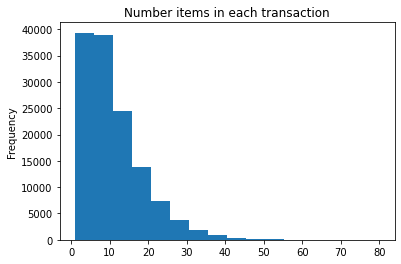

In [15]:
plt.title('Number items in each transaction')
baskets['leng'].plot.hist(bins=16)

## Statistical rules with sup=0.001  conf=0.2

In [19]:
df = pd.read_csv('./data/assoRules_pd.csv')
df

,antecedent,consequent,confidence,lift
0,"['Broccoli Crown', 'Organic Strawberries']",['Banana'],0.369077,2.586044
1,['Sugar Snap Peas'],['Bag of Organic Bananas'],0.220700,1.870662
2,"['Organic Red Onion', 'Organic Strawberries']",['Bag of Organic Bananas'],0.346734,2.938926
3,"['Organic Red Onion', 'Organic Strawberries']",['Organic Baby Spinach'],0.227806,3.055004
4,['85% Lean Ground Beef'],['Banana'],0.235202,1.648013
...,...,...,...,...
1167,"['Organic Baby Carrots', 'Banana']",['Organic Strawberries'],0.208390,2.509878
1168,"['Organic Baby Carrots', 'Banana']",['Organic Baby Spinach'],0.209743,2.812771
1169,['Organic Yellow Squash'],['Organic Zucchini'],0.467700,13.372518
1170,"['Organic Baby Arugula', 'Banana']",['Organic Avocado'],0.234007,4.144121


In [28]:
ante_leng = [len(x.split(',')) for x in df['antecedent']]
df['ante_leng'] = ante_leng
df.describe()

,confidence,lift,ante_leng
count,1172.000000,1172.000000,1172.000000
mean,0.280157,4.944418,1.621160
std,0.068645,9.235015,0.522586
min,0.200000,1.402184,1.000000
25%,0.229066,2.156469,1.000000
50%,0.261732,3.080405,2.000000
75%,0.312141,4.132758,2.000000
max,0.598425,80.298014,3.000000


<AxesSubplot:title={'center':'Number data in each antecedent length'}>

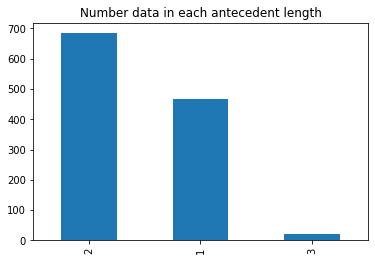

In [44]:
plt.title('Number data in each antecedent length')
df['ante_leng'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Confident '}, ylabel='Frequency'>

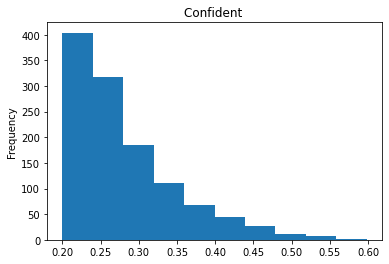

In [45]:
plt.title('Confident ')
df['confidence'].plot.hist(bins=10)

## Statistical for instacart_prior

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
baskets = pd.read_csv('./data/baskets_prior.csv')
print(baskets.head())

   order_id                                              items
0       148  ['Organic Baby Spinach', 'Mango Chunks', 'Orga...
1       463                                  ['Glass Cleaner']
2       471  ['Roasted Tomato Salsa Serrano-Tomatillo', 'Sh...
3       496  ['Air Chilled Organic Boneless Skinless Chicke...
4       833  ['Natural Cane Turbinado Sugar', 'Calming Sham...


In [3]:
from ast import literal_eval
baskets['items'] = baskets['items'].map(literal_eval)

In [4]:
leng = [len(x) for x in baskets['items']]
baskets['leng'] = leng

In [5]:
baskets.describe()

,order_id,leng
count,3.214874e+06,3.214874e+06
mean,1.710827e+06,1.008888e+01
std,9.875206e+05,7.525398e+00
min,2.000000e+00,1.000000e+00
25%,8.556832e+05,5.000000e+00
50%,1.711120e+06,8.000000e+00
75%,2.566034e+06,1.400000e+01
max,3.421083e+06,1.450000e+02


<AxesSubplot:title={'center':'Number items in each transaction smBaskets_prior1'}, ylabel='Frequency'>

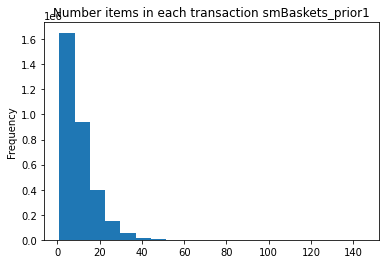

In [35]:
plt.title('Number items in each transaction smBaskets_prior1')
baskets['leng'].plot.hist(bins=20)

In [6]:
# code remove duplicate if had
items = baskets['items'].to_list()
items = [list(set(item))for item in items]

# test new df
df = pd.DataFrame()
df['new_items'] = items
df["new_items"] = df.new_items.apply(lambda x: str(x)) 
print(df.dtypes)

# drop
df.drop_duplicates(subset='new_items', keep="first")
df.count()

In [17]:
df

,new_items
0,"['Organic Hass Avocado', 'Organic Coconut Milk..."
1,['Glass Cleaner']
2,"['Applewood Smoked Bacon', 'Thin & Light Torti..."
3,"['Green Beans', 'Air Chilled Organic Boneless ..."
4,"['Natural Cane Turbinado Sugar', 'Organic Hass..."
...,...
3214869,['Gluten Free Brown Rice English Muffins 6 ct']
3214870,"['Mini Snack Saver Clips', 'Total Plain Greek ..."
3214871,"['Organic Large White Flesh Peach', 'Organic S..."
3214872,"['Shredded Mild Cheddar Cheese', 'Organic Avoc..."


In [16]:
df.drop_duplicates(subset='new_items', keep="first")
df.count()

new_items    3214874
dtype: int64

### Statistical popular of items

In [4]:
baskets['items'].iloc[0]

['Organic Baby Spinach',
 'Mango Chunks',
 'Organic Unsweetened Almond Milk',
 'Organic Coconut Milk',
 'Organic Red Lentils',
 'Cage Free Large White Eggs',
 'Organic Large Green Asparagus',
 'Sweet Onion',
 'Goat Milk',
 'Organic Yukon Select Fries',
 'Crackers Harvest Whole Wheat',
 'Organic Hass Avocado',
 'Simply White Natural Clean Mint Fluoride Toothpaste',
 'Avocado Oil, Refined']

In [20]:
from collections import Counter

arr = baskets['items'].tolist()
arr_count = Counter([x[2:(len(x)-1)] for sublist in arr for x in sublist[1:(len(sublist)-1)].split(',')])
common = Counter(arr_count).most_common(100)
dictionary = dict(common)
dictionary

{'Banana': 471176,
 'Bag of Organic Bananas': 365486,
 'Organic Strawberries': 261040,
 'Organic Hass Avocado': 212096,
 'Organic Avocado': 175144,
 'Large Lemon': 144149,
 'Strawberries': 141513,
 'Limes': 138528,
 'Organic Whole Milk': 136512,
 'rganic Baby Spinach': 124782,
 'Organic Baby Spinach': 117139,
 'Organic Raspberries': 111909,
 'Organic Garlic': 102053,
 'Organic Zucchini': 100914,
 'Organic Blueberries': 97631,
 'Organic Lemon': 87649,
 'Organic Grape Tomatoes': 83432,
 'Seedless Red Grapes': 81878,
 'Organic Yellow Onion': 81276,
 'Apple Honeycrisp Organic': 80012,
 'Honeycrisp Apple': 78547,
 'Cucumber Kirby': 77769,
 'Organic Baby Carrots': 76328,
 'Organic Large Extra Fancy Fuji Apple': 74611,
 'Sparkling Water Grapefruit': 74384,
 'Organic Cucumber': 72639,
 'Yellow Onions': 71905,
 'Carrots': 71145,
 'Organic Gala Apples': 70833,
 'Original Hummus': 70794,
 'Fresh Cauliflower': 70392,
 'Half & Half': 67494,
 'Michigan Organic Kale': 67221,
 'Asparagus': 66602,
 'Or

In [23]:
# save most common dictionary pkl
import pickle
filename = './model/most_common_dict.pkl'
pickle.dump(dictionary, open(filename, 'wb'))

In [17]:
for sublist in arr:
    print(sublist[1:(len(sublist)-1)])
    break
    print(type(sublist))

'Organic Baby Spinach', 'Mango Chunks', 'Organic Unsweetened Almond Milk', 'Organic Coconut Milk', 'Organic Red Lentils', 'Cage Free Large White Eggs', 'Organic Large Green Asparagus', 'Sweet Onion', 'Goat Milk', 'Organic Yukon Select Fries', 'Crackers Harvest Whole Wheat', 'Organic Hass Avocado', 'Simply White Natural Clean Mint Fluoride Toothpaste', 'Avocado Oil, Refined'


In [22]:
print('Mean frequent items of transaction:',np.array([dictionary[k] for k in dictionary]).mean())

Mean frequent items of transaction:  70709.28


## Test baskets rules

In [11]:
import pandas as pd
baskets = pd.read_csv('./data/assoRules_baskets.csv')
baskets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14144121 entries, 0 to 14144120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   antecedent  object 
 1   consequent  object 
 2   confidence  float64
 3   lift        float64
dtypes: float64(2), object(2)
memory usage: 431.6+ MB


In [21]:
baskets

,antecedent,consequent,confidence,lift,leng
0,"['Organic Fresh Basil', 'Organic Ginger Root',...",['Organic Hass Avocado'],1.000000,18.657480,92
1,"['Organic Fresh Basil', 'Organic Ginger Root',...",['Organic Garlic'],1.000000,31.771252,92
2,"['Organic Romaine Lettuce', 'Organic Basil', '...",['Organic Roasted Turkey Breast'],1.000000,126.982851,142
3,['Total 2% All Natural Greek Strained Yogurt w...,['Limes'],1.000000,21.919519,119
4,['Organic Frosted Maple Brown Sugar Toaster Pa...,['Organic Cucumber'],1.000000,29.790043,98
...,...,...,...,...,...
14144116,"['Organic Butternut Squash', 'Organic Tomato C...",['Organic Baby Broccoli'],1.000000,99.391779,99
14144117,"['Organic Butternut Squash', 'Organic Tomato C...",['Organic Strawberries'],1.000000,12.418763,99
14144118,"['Organic Black Beans', 'Organic Carrot Bunch'...",['Red Peppers'],0.666667,30.495495,116
14144119,"['Organic Black Beans', 'Organic Carrot Bunch'...",['Organic Avocado'],0.666667,11.967172,116


         confidence          lift          leng
count  1.414412e+07  1.414412e+07  1.414412e+07
mean   9.175371e-01  2.880546e+02  4.726613e+00
std    1.436793e-01  1.086328e+03  1.938988e+00
min    6.000000e-01  4.341069e+00  1.000000e+00
25%    8.571429e-01  1.679782e+01  3.000000e+00
50%    1.000000e+00  3.457105e+01  4.000000e+00
75%    1.000000e+00  1.052176e+02  5.000000e+00
max    1.000000e+00  5.923750e+04  1.800000e+01 

top metric:
          confidence          lift          leng
count  1.876190e+06  1.876190e+06  1.876190e+06
mean   9.999995e-01  1.749248e+03  6.736331e+00
std    2.147693e-04  2.436838e+03  2.975846e+00
min    9.090909e-01  2.882603e+02  1.000000e+00
25%    1.000000e+00  4.915975e+02  4.000000e+00
50%    1.000000e+00  9.402778e+02  6.000000e+00
75%    1.000000e+00  2.193981e+03  9.000000e+00
max    1.000000e+00  5.923750e+04  1.800000e+01


<AxesSubplot:title={'center':'Number items in antecedent'}, ylabel='Frequency'>

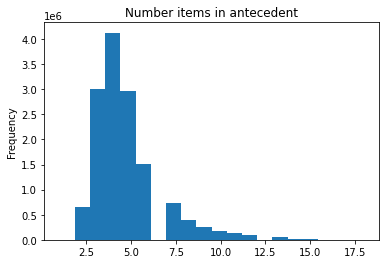

In [12]:
leng = [len(x.split(',')) for x in baskets['antecedent']]
baskets['leng'] = leng

print(baskets.describe(),'\n')

###
trans_top_metric = baskets[(baskets.lift>288) & (baskets.confidence > 0.9)]
print('top metric:\n', trans_top_metric.describe())

###
plt.title('Number items in antecedent')
baskets['leng'].plot.hist(bins=20)

#### after remove popular

In [13]:
import pandas as pd
df_arm = pd.read_csv('./postProcessing/data_post/df_remove_popular.csv')
df_arm.head()

,antecedent,consequent,confidence,lift
0,"{'Organic Baby Spinach', 'Organic Ginger Root'...",['Organic Hass Avocado'],1.0,18.657480
1,"{'Organic Baby Spinach', 'Organic Ginger Root'...",['Organic Garlic'],1.0,31.771252
2,"{'Organic Raspberries', 'Organic Kiwi', 'Organ...",['Organic Roasted Turkey Breast'],1.0,126.982851
3,"{'Boneless Skinless Chicken Breast', 'Total 2%...",['Limes'],1.0,21.919519
4,{'Organic Frosted Maple Brown Sugar Toaster Pa...,['Organic Cucumber'],1.0,29.790043


In [57]:
df_arm['antecedent'].head(10000).to_list()

["{'Organic Baby Spinach', 'Organic Ginger Root', 'Organic Fresh Basil', 'Organic Whole Milk'}",
 "{'Organic Baby Spinach', 'Organic Ginger Root', 'Organic Fresh Basil', 'Organic Whole Milk'}",
 "{'Organic Raspberries', 'Organic Kiwi', 'Organic Lemon', 'Organic Basil', 'Organic Garlic', 'Organic Romaine Lettuce'}",
 "{'Boneless Skinless Chicken Breast', 'Total 2% All Natural Greek Strained Yogurt with Honey'}",
 "{'Organic Frosted Maple Brown Sugar Toaster Pastries', 'Pizza 4 Cheese'}",
 "{'Organic Frosted Maple Brown Sugar Toaster Pastries', 'Pizza 4 Cheese'}",
 "{'Organic Baby Spinach', 'Half & Half', 'Cream Cheese Spread'}",
 "{'Organic Baby Spinach', 'Half & Half', 'Cream Cheese Spread'}",
 "{'Organic Baby Spinach', 'Half & Half', 'Cream Cheese Spread'}",
 "{'Organic Baby Spinach', 'Half & Half', 'Cream Cheese Spread'}",
 "{'White Corn', 'Organic Italian Parsley Bunch', 'Garlic', 'Chicken Thighs', 'Organic Grape Tomatoes', 'Organic Fettuccine', 'Organic Red Onion'}",
 "{'White Corn

         confidence          lift          leng
count  1.414412e+07  1.414412e+07  1.414412e+07
mean   9.175371e-01  2.880546e+02  4.182149e+00
std    1.436793e-01  1.086328e+03  1.889056e+00
min    6.000000e-01  4.341069e+00  1.000000e+00
25%    8.571429e-01  1.679782e+01  3.000000e+00
50%    1.000000e+00  3.457105e+01  4.000000e+00
75%    1.000000e+00  1.052176e+02  5.000000e+00
max    1.000000e+00  5.923750e+04  1.800000e+01 

top metric:
          confidence          lift          leng
count  1.876190e+06  1.876190e+06  1.876190e+06
mean   9.999995e-01  1.749248e+03  6.242867e+00
std    2.147693e-04  2.436838e+03  2.923895e+00
min    9.090909e-01  2.882603e+02  1.000000e+00
25%    1.000000e+00  4.915975e+02  4.000000e+00
50%    1.000000e+00  9.402778e+02  6.000000e+00
75%    1.000000e+00  2.193981e+03  8.000000e+00
max    1.000000e+00  5.923750e+04  1.700000e+01


<AxesSubplot:title={'center':'Number items in antecedent'}, ylabel='Frequency'>

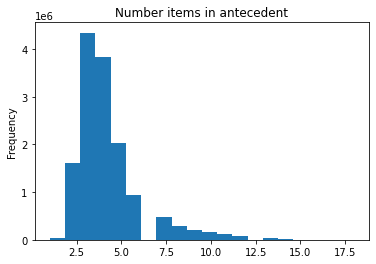

In [14]:
leng = [len(x.split(',')) for x in df_arm['antecedent']]
df_arm['leng'] = leng

print(df_arm.describe(),'\n')

###
trans_top_metric = df_arm[(df_arm.lift>288) & (df_arm.confidence > 0.9)]
print('top metric:\n', trans_top_metric.describe())
# print(trans_top_metric.head())

###
plt.title('Number items in antecedent')
df_arm['leng'].plot.hist(bins=20)

In [17]:
trans_top_metric.head(1000).to_csv('./data/top_metric_example.csv', index=None)